In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


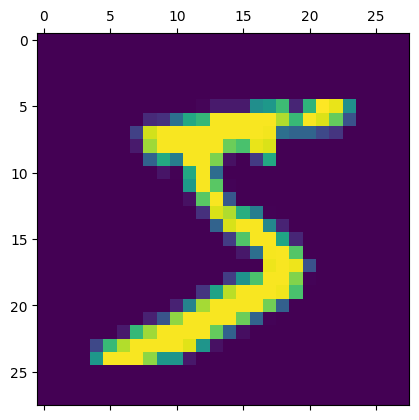

In [4]:
plt.matshow(x_train[0])

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 2.3556 - accuracy: 0.1706
loss=2.356
Accuracy=0.171


In [11]:
#Making Prediction on new data

<function matplotlib.pyplot.show(close=None, block=None)>

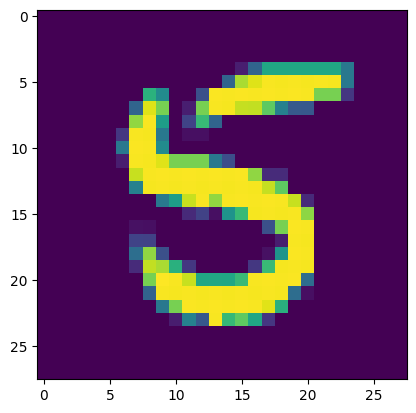

In [12]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [13]:
test_predict = model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


In [14]:
test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test,predictions=test_predict_labels)
print('confusion matrix of the test set:\n', confusion_matrix)

313/313 [==============================] - 0s 1ms/step
confusion matrix of the test set:
 tf.Tensor(
[[  0  76  10   0   5   7 215 531   0 136]
 [  0 156   1   0 259   0  80 350   0 289]
 [  0  77  24   0  37  11 407 334   0 142]
 [  0 115  20   0 104   1  69 363   0 338]
 [  0  48   3   0   3  20 205 181   2 520]
 [  0 191  11   1  16  10 104 218   0 341]
 [  0 130   0   0   0   4 452 200   0 172]
 [  0 224   4   7  94  11 193 348   1 146]
 [  0 122  74   0  14   2 205 215   0 342]
 [  0  88   4   0  19   1 112  72   0 713]], shape=(10, 10), dtype=int32)
